## Libraries

In [1]:
# Import libraries
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Weather Data Extraction

In [13]:
january=["1/1/2022","1/31/2022","January.csv"]
february=["2/1/2022","2/28/2022","February.csv"]
march=["3/1/2022","3/31/2022","March.csv"]
april=["4/1/2022","4/30/2022","April.csv"]
may=["5/1/2022","5/31/2022","May.csv"]
june=["6/1/2022","6/30/2022","June.csv"]
july=["7/1/2022","7/31/2022","July.csv"]
august=["8/1/2022","8/31/2022","August.csv"]
september=["9/1/2022","9/30/2022","September.csv"]
october=["10/1/2022","10/31/2022","October.csv"]
november=["11/1/2022","11/30/2022","November.csv"]
december=["12/1/2022","12/31/2022","December.csv"]

def process_webpage(start,end,filename):
    # 1.list of dates
    range_date = pd.date_range(start, end, freq='M')
    dates = [str(i)[:4]+str(i)[5:7] for i in range_date]
    print(dates[0:5])
    
    # 2. Information extracted from page
    df_list=[]
    index=[]
    for k in tqdm(range(len(dates))):
        url = 'https://www.estesparkweather.net/archive_reports.php?date=' + dates[k]
        page = requests.get(url) #download the webpage 
    
    # 3. Data parsing using BeautifulSoup
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find_all('table')
    type(table)
    # to remove rows not req for extraction
    parsed_data = [row.text.splitlines() for row in table]
    parsed_data = parsed_data[:-9] 
    # removing all empty list for better view using slicing
    for l in range(len(parsed_data)):
        parsed_data[l] = parsed_data[l][2:len(parsed_data[l]):3]
    
    # 4. Extracting numerical values from string using regex
    for i in range(len(parsed_data)):
        c=['.'.join(re.findall("\d+", str(parsed_data[i][j].split()[:5]))) for j in range(len(parsed_data[i]))]
        df_list.append(c)
        index.append(dates[k] + c[0]) # \d+ is to give numerical values
    
    # 5. Removing junk datapoints (length>20 -- index no, 19 data) 
    f_index = [index[i] for i in range(len(index)) if len(index[i])>6]
    data = [df_list[i][1:] for i in range(len(df_list)) if len(df_list[i][1:])==19]
    #convert index in yyyy-mm-dd date format
    final_index = [datetime.strptime(str(f_index[i]),'%Y%m%d').strftime('%Y-%m-%d') for i in range(len(f_index))]

    #7. Create DataFrame 
    column_data = ['Avg. Temperature(°F)', 'Avg. Humidity(%)',
               'Avg. Dewpoint(°F)', 'Avg. Barometer(in)',
               'Avg. Windspeed(mph)', 'Avg. Gust speed(mph)',
               'Avg. Direction(°deg)', 'Rainfall for month(in)',
               'Rainfall for year(in)', 'Max. rain per minute',
               'Max. Temperature(°F)', 'Min. Temperature(°F)',
               'Max. Humidity(%)', 'Min. Humidity(%)',
               'Max. Pressure', 'Min. Pressure',
               'Max. Windspeed(mph)', 'Max. Gust speed(mph)',
               'Max. Heat Index(°F)']
    final_dataframe = pd.DataFrame(data, columns = column_data, index = final_index)
    final_dataframe.head(31)
    final_dataframe.to_csv(filename)
    
    #EDA - correlation plot
    final_data=pd.read_csv('Weather_Data_.csv')
    relation = final_data.corr()  # assign data correlation matrix
    plt.figure(figsize=(10,8))  # Increase the size of the heatmap
    sns.heatmap(data=relation)# Store heatmap object
    plt.title("Correlation of columns in the dataframe") # title to the heatmap
    plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # EDA - 
    print(final_data.describe())

In [4]:
process_webpage(*january)
process_webpage(*february)
process_webpage(*march)
process_webpage(*april)
process_webpage(*may)
process_webpage(*june)
process_webpage(*july)
process_webpage(*august)
process_webpage(*september)
process_webpage(*october)
process_webpage(*november)
process_webpage(*december)

['202201']


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


['202202']


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


['202203']


100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


['202204']


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


['202205']


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


['202206']


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


['202207']


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


['202208']


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


['202209']


100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


['202210']


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


['202211']


100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


['202212']


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


['202212']


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


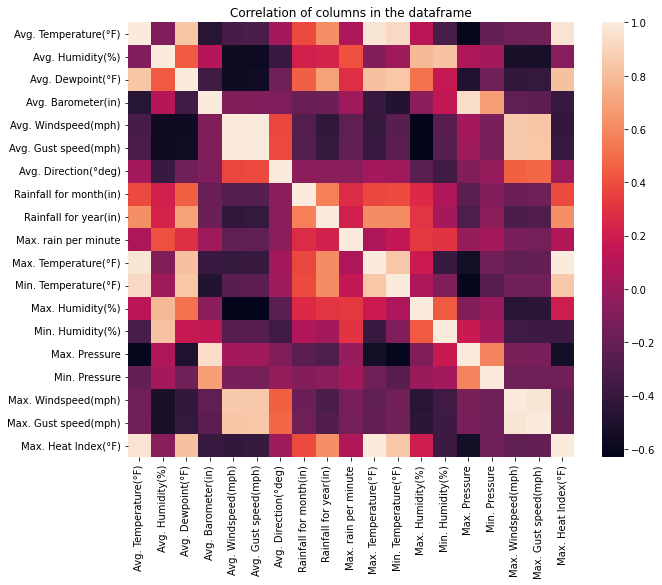

       Avg. Temperature(°F)  Avg. Humidity(%)  Avg. Dewpoint(°F)  \
count            608.000000        608.000000         608.000000   
mean              43.361020         54.782895          25.741776   
std               16.204503         17.395645          15.807370   
min                0.100000         13.000000           0.100000   
25%               31.275000         42.000000          12.100000   
50%               43.850000         54.000000          23.750000   
75%               57.000000         68.000000          40.825000   
max               74.700000         94.000000          54.100000   

       Avg. Barometer(in)  Avg. Windspeed(mph)  Avg. Gust speed(mph)  \
count          608.000000           608.000000            608.000000   
mean            29.836678             5.439638              8.418421   
std              0.254230             3.714510              5.260022   
min             29.100000             0.700000              1.400000   
25%             29.700000  

In [14]:
process_webpage(*december)

## Merge files

In [14]:
import glob
import pandas as pd

In [20]:
# Merge files
def merge_files():
    # path to csv files
    path = "C:/Users/Hp/Downloads/Weather"
    file_list = glob.glob(path + "/*.xlsx")
    print(file_list)
    # files to merge
    excl_list=[]
    for file in file_list:
        excl_list.append(pd.read_excel(file))
    # dataframe to store merged file
    excl_merged = pd.DataFrame()
    for excl_file in excl_list:
        excl_merged = excl_merged.append(excl_file, ignore_index=True)
    # export dataframe to excel file with specified name
    excl_merged.to_excel('Weather_Data.xlsx',index=False)
    
merge_files()

['C:/Users/Hp/Downloads/Weather\\1. January.xlsx', 'C:/Users/Hp/Downloads/Weather\\1.1 January.xlsx', 'C:/Users/Hp/Downloads/Weather\\10.1 October.xlsx', 'C:/Users/Hp/Downloads/Weather\\11.1 November.xlsx', 'C:/Users/Hp/Downloads/Weather\\12.1 December.xlsx', 'C:/Users/Hp/Downloads/Weather\\2. February.xlsx', 'C:/Users/Hp/Downloads/Weather\\2.1 February.xlsx', 'C:/Users/Hp/Downloads/Weather\\3. March.xlsx', 'C:/Users/Hp/Downloads/Weather\\3.1 March.xlsx', 'C:/Users/Hp/Downloads/Weather\\4. April.xlsx', 'C:/Users/Hp/Downloads/Weather\\4.1 April.xlsx', 'C:/Users/Hp/Downloads/Weather\\5. May.xlsx', 'C:/Users/Hp/Downloads/Weather\\5.1 May.xlsx', 'C:/Users/Hp/Downloads/Weather\\6. June.xlsx', 'C:/Users/Hp/Downloads/Weather\\6.1 June.xlsx', 'C:/Users/Hp/Downloads/Weather\\7. July.xlsx', 'C:/Users/Hp/Downloads/Weather\\7.1 July.xlsx', 'C:/Users/Hp/Downloads/Weather\\8. August.xlsx', 'C:/Users/Hp/Downloads/Weather\\8.1 August.xlsx', 'C:/Users/Hp/Downloads/Weather\\9.1 September.xlsx']
